In [ ]:
import pandas as pd
pd.set_option('max_columns', None)
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
one_race_cols = {"Driver": "Driver", "Car": "Car #", "AvgStart": "Start", "AvgMidRace": "Mid Race", "AvgFinish": "Finish",
                 "Avg Pos": "Average Position", "PassDiff": "Pass Differential", "GreenPass": "Green Passes",
                 "GreenPassed": "Green Passed", "QualityPasses": "Quality Passes",
                 "PercentQualityPasses": "% Quality Passes", "NumFastestLaps": "# Fastest Laps",
                 "LapsinTop15": "Laps in Top 15", "PercentLapsTop15": "% Laps in Top 15", "LapsLed": "Laps Led",
                 "PercentLapsLed": "% Laps Led", "TotalLaps": "Total Laps", "DriverRating": "Driver Rating",
                 "Pts": "Points"}

one_race_cols_2 = {"Driver": "Driver", "Car": "Car #", "AvgPos": "Average Position", "PassDiff": "Pass Differential",
                   "GreenPass": "Green Passes", "GreenPassed": "Green Passed", "QualityPasses": "Quality Passes",
                   "PercentQualityPasses": "% Quality Passes", "NumFastestLaps": "# Fastest Laps",
                   "LapsTop15": "Laps in Top 15", "PercentLapsTop15": "% Laps in Top 15", "LapsLed": "Laps Led",
                   "PercentLapsLed": "% Laps Led", "TotalLaps": "Total Laps", "DriverRating": "Driver Rating",
                   "Pts": "Points", "StartPos": "Start", "MidRace": "Mid Race", "FinishPos": "Finish"}

car_nums = {"AJ Allmendinger": 16, "Aric Almirola": 10, "Christopher Bell": 20, "Greg Biffle": 44,
             "Josh Bilicki": 77, "Ryan Blaney": 12, "Alex Bowman": 48, "Chase Briscoe": 14,
             "Chris Buescher": 17, "Harrison Burton": 21, "Kurt Busch": 45, "Kyle Busch": 18,
             "William Byron": 24, "Landon Cassill": 77, "Ross Chastain": 1,
             "Austin Cindric": 2, "Cole Custer": 41, "Austin Dillon": 3, "Ty Dillon": 42,
             "Chase Elliott": 9, "Todd Gilliland": 38, "Noah Gragson": 16, "Kaz Grala": 50,
             "Denny Hamlin": 11, "Joey Hand": 15, "Kevin Harvick": 4, "Justin Haley": 31,
             "Daniel Hemric": 16, "Loris Hezemans": 27, "Erik Jones": 20, "Brad Keselowski": 6,
             "Corey LaJoie": 7, "Kyle Larson": 5, "Joey Logano": 22, "BJ McLeod": 78,
             "Michael McDowell": 34, "Ryan Preece": 15, "David Ragan": 15, "Tyler Reddick": 8,
             "Boris Said": 66, "Garrett Smithley": 15, "Ricky Stenhouse Jr.": 47, "Daniel Suárez": 99,
             "Martin Truex Jr.": 19, "Jacques Villeneuve": 27, "Bubba Wallace": 23, "Cody Ware": 51}

teams = {"AJ Allmendinger": "Kaulig", "Aric Almirola": "SHR", "Christopher Bell": "JGR", "Greg Biffle": "NYR",
        "Josh Bilicki": "Spire", "Ryan Blaney": "Penske", "Alex Bowman": "Hendrick", "Chase Briscoe": "SHR",
        "Chris Buescher": "RFK", "Harrison Burton": "WBR", "Kurt Busch": "23X1", "Kyle Busch": "JGR",
        "William Byron": "Hendrick", "Landon Cassill": "Spire", "Ross Chastain": "Trackhouse", "Austin Cindric": "Penske",
        "Cole Custer": "SHR", "Austin Dillon": "RCR", "Ty Dillon": "PGMS", "Chase Elliott": "Hendrick",
        "Todd Gilliland": "FRM", "Noah Gragson": "Kaulig", "Kaz Grala": "TMT", "Denny Hamlin": "JGR",
        "Joey Hand": "RWR", "Kevin Harvick": "SHR", "Justin Haley": "Kaulig", "Daniel Hemric": "Kaulig",
        "Loris Hezemans": "Hezeberg", "Erik Jones": "PGMS", "Brad Keselowski": "RFK", "Corey LaJoie": "Spire",
        "Kyle Larson": "Hendrick", "Joey Logano": "Penske", "BJ McLeod": "LFM", "Michael McDowell": "FRM",
        "Ryan Preece": "RWR", "David Ragan": "RWR", "Tyler Reddick": "RCR", "Boris Said": "MBM",
        "Garrett Smithley": "RWR", "Ricky Stenhouse Jr.": "JTGD", "Daniel Suárez": "Trackhouse", "Martin Truex Jr.": "JGR",
        "Jacques Villeneuve": "Hezeberg", "Bubba Wallace": "23X1", "Cody Ware": "RWR"}

makes = {"23X1": "Toyota", "Beard": "Chevy", "FRM": "Ford", "Hendrick": "Chevy",
        "Hezeberg": "Ford", "JGR": "Toyota", "JTGD": "Chevy", "Kaulig": "Chevy",
        "LFM": "Ford", "MBM": "Ford", "NYR": "Chevy", "Penske": "Ford",
        "PGMS": "Chevy", "RCR": "Chevy", "RFK": "Ford", "RWR": "Ford",
        "SHR": "Ford", "Spire": "Chevy", "TMT": "Chevy", "Trackhouse": "Chevy",
        "WBR": "Ford"}

track_types = {"Auto Club": "Speedway", "Atlanta": "Superpeedway", "Bristol": "Short Track", "COTA": "Road Course",
               "Daytona": "Superspeedway", "Las Vegas": "Speedway", "Martinsville": "Short Track", "Phoenix": "Speedway",
               "Richmond": "Short Track", "Talladega": "Superspeedway"}

cup_laps = {1: 201}

In [ ]:
# /work/Milestone_I/data/loop_TobyChristie/csv/2022
daytona1 = pd.read_csv('/work/Milestone_I/data/loop_TobyChristie/csv/2022/20220220_Daytona500.csv')
autoclub = pd.read_csv('/work/Milestone_I/data/loop_TobyChristie/csv/2022/20220227_AutoClub.csv')
print(daytona1.columns)
print(autoclub.columns)
daytona1.head()

Index(['Car', 'Driver', 'AvgStart', 'AvgMidRace', 'AvgFinish', 'Avg Pos',
       'PassDiff', 'GreenPass', 'GreenPassed', 'QualityPasses',
       'PercentQualityPasses', 'NumFastestLaps', 'LapsinTop15',
       'PercentLapsTop15', 'LapsLed', 'PercentLapsLed', 'TotalLaps',
       'DriverRating', 'Pts'],
      dtype='object')
Index(['Car', 'Driver', 'StartPos', 'MidRace', 'CloserPos', 'FinishPos',
       'HighPos', 'LowPos', 'AvgPos', 'PassDiff', 'GreenPass', 'GreenPassed',
       'QualityPasses', 'PercentQualityPasses', 'NumFastestLaps', 'LapsTop15',
       'PercentLapsTop15', 'LapsLed', 'PercentLapsLed', 'TotalLaps',
       'DriverRating', 'Pts'],
      dtype='object')


,Car,Driver,AvgStart,AvgMidRace,AvgFinish,Avg Pos,PassDiff,GreenPass,GreenPassed,QualityPasses,PercentQualityPasses,NumFastestLaps,LapsinTop15,PercentLapsTop15,LapsLed,PercentLapsLed,TotalLaps,DriverRating,Pts
0,2,Austin Cindric,5.0,2.0,1.0,6.2,-13,168,181,125,74.4,0,176,87.6,21,10.4,201,122.4,54
1,6,Brad Keselowski,3.0,5.0,9.0,4.8,1,171,170,148,86.5,4,198,98.5,67,33.3,201,121.3,54
2,19,Martin Truex Jr,14.0,18.0,13.0,11.9,25,258,233,192,74.4,4,143,71.1,11,5.5,201,94.0,49
3,23,Bubba Wallace,16.0,19.0,2.0,10.2,16,253,237,191,75.5,7,145,72.1,12,6.0,201,104.7,47
4,14,Chase Briscoe,9.0,10.0,3.0,18.3,17,209,192,70,33.5,6,88,43.8,0,0.0,201,75.0,41


In [ ]:
def add_Races(prev_df, curr_df):
    prev_df = prev_df.set_index('Driver')
    curr_df = curr_df.set_index('Driver')
    df = curr_df.copy()
    df["Races"] = 1
    for driver in df.index:
        if driver in prev_df.index:
            if curr_df.loc[driver, "TotalLaps"] != prev_df.loc[driver, "TotalLaps"]:
                df.loc[driver, "Races"] = prev_df.loc[driver, "Races"] + 1
            
    df = df.reset_index(drop = False)
    return df

daytona1["Races"] = 1
autoclub = add_Races(daytona1, autoclub)
autoclub.head()

,Driver,Car,StartPos,MidRace,CloserPos,FinishPos,HighPos,LowPos,AvgPos,PassDiff,GreenPass,GreenPassed,QualityPasses,PercentQualityPasses,NumFastestLaps,LapsTop15,PercentLapsTop15,LapsLed,PercentLapsLed,TotalLaps,DriverRating,Pts,Races
0,Kyle Larson,5,13,3,2,1,1,25,7.1,24,83,59,63,75.90,16,183,91.5,28,14.0,200,116.3,52,2
1,Austin Dillon,3,16,12,3,2,2,31,15.6,-22,97,119,52,53.61,3,118,59.0,0,0.0,200,82.9,35,2
2,Erik Jones,43,2,7,6,3,1,12,4.3,13,72,59,64,88.89,23,200,100.0,18,9.0,200,122.7,52,2
3,Daniel Suarez,99,15,26,4,4,1,31,14.5,-3,96,99,54,56.25,0,115,57.5,0,0.0,200,86.2,33,2
4,Joey Logano,22,7,4,1,5,1,20,5.4,32,87,55,66,75.86,5,198,99.0,14,7.0,200,110.3,44,2


In [ ]:
_deepnote_run_altair(autoclub, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Driver","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"StartPos","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"FinishPos","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [ ]:
daytona1 = daytona1.rename(columns = one_race_cols, errors = "raise")
autoclub = autoclub.rename(columns = one_race_cols_2, errors = "raise")
autoclub = autoclub.drop(['CloserPos', 'HighPos', 'LowPos'], axis = 1)
print(daytona1.head())
print(autoclub.head())
print(daytona1.columns == autoclub.columns)

   Car #           Driver  Start  Mid Race  Finish  Average Position  \
0      2   Austin Cindric    5.0       2.0     1.0               6.2   
1      6  Brad Keselowski    3.0       5.0     9.0               4.8   
2     19  Martin Truex Jr   14.0      18.0    13.0              11.9   
3     23    Bubba Wallace   16.0      19.0     2.0              10.2   
4     14    Chase Briscoe    9.0      10.0     3.0              18.3   

   Pass Differential  Green Passes  Green Passed  Quality Passes  \
0                -13           168           181             125   
1                  1           171           170             148   
2                 25           258           233             192   
3                 16           253           237             191   
4                 17           209           192              70   

   % Quality Passes  # Fastest Laps  Laps in Top 15  % Laps in Top 15  \
0              74.4               0             176              87.6   
1           

In [ ]:
def add_cols(df, track = "", racenum = 0):
    df["Points Eligible"] = [1 if row > 0 else 0 for row in df["Points"]]
    df["Team"] = df["Driver"].map(teams)
    df["Make"] = df["Team"].map(makes)
    df["Race #"] = racenum
    df["Track"] = track
    df["Track Type"] = df["Track"].map(track_types)
    df["Quality Passes Per Lap"] = round(df["Quality Passes"] / df["Total Laps"], 3)

In [ ]:
add_cols(daytona1, "Daytona", 1)
daytona1

,Car #,Driver,Start,Mid Race,Finish,Average Position,Pass Differential,Green Passes,Green Passed,Quality Passes,% Quality Passes,# Fastest Laps,Laps in Top 15,% Laps in Top 15,Laps Led,% Laps Led,Total Laps,Driver Rating,Points,Races,Points Eligible,Team,Make,Race #,Track,Track Type,Quality Passes Per Lap
0,2,Austin Cindric,5.0,2.0,1.0,6.2,-13,168,181,125,74.4,0,176,87.6,21,10.4,201,122.4,54,1,1,Penske,Ford,1,Daytona,Superspeedway,0.622
1,6,Brad Keselowski,3.0,5.0,9.0,4.8,1,171,170,148,86.5,4,198,98.5,67,33.3,201,121.3,54,1,1,RFK,Ford,1,Daytona,Superspeedway,0.736
2,19,Martin Truex Jr,14.0,18.0,13.0,11.9,25,258,233,192,74.4,4,143,71.1,11,5.5,201,94.0,49,1,1,NaN,NaN,1,Daytona,Superspeedway,0.955
3,23,Bubba Wallace,16.0,19.0,2.0,10.2,16,253,237,191,75.5,7,145,72.1,12,6.0,201,104.7,47,1,1,23X1,Toyota,1,Daytona,Superspeedway,0.950
4,14,Chase Briscoe,9.0,10.0,3.0,18.3,17,209,192,70,33.5,6,88,43.8,0,0.0,201,75.0,41,1,1,SHR,Ford,1,Daytona,Superspeedway,0.348
5,12,Ryan Blaney,7.0,1.0,4.0,8.3,-18,163,181,134,82.2,3,175,87.1,36,17.9,201,107.5,41,1,1,Penske,Ford,1,Daytona,Superspeedway,0.667
6,34,Michael McDowell,6.0,8.0,7.0,11.9,-19,222,241,160,72.1,2,144,71.6,0,0.0,201,93.6,39,1,1,FRM,Ford,1,Daytona,Superspeedway,0.796
7,18,Kyle Busch,10.0,20.0,6.0,11.4,9,255,246,182,71.4,5,125,62.2,28,13.9,201,101.4,38,1,1,JGR,Toyota,1,Daytona,Superspeedway,0.905
8,17,Chris Buescher,4.0,3.0,16.0,7.9,-13,161,174,136,84.5,1,173,86.1,0,0.0,200,97.4,35,1,1,RFK,Ford,1,Daytona,Superspeedway,0.680
9,9,Chase Elliott,11.0,23.0,10.0,16.1,-2,249,251,131,52.6,6,93,46.3,0,0.0,201,72.5,34,1,1,Hendrick,Chevy,1,Daytona,Superspeedway,0.652


In [ ]:
def raw_laps_to_stats(json_file): # Takes lap-times.json file from Race Center, mapping lap stats to drivers
    
    f = open(json_file)
    data = json.load(f)
    
    driver_stats = {}
    
    for i in data["laps"]:
        driver = i["FullName"]
        if driver.startswith("*") == True:
            driver = driver[2:]
        if driver.endswith("#") == True:
            driver = driver[:-2]
        elif driver.endswith(")") == True:
            driver = driver[:-3]
        if driver == "William Byron Jr.":
            driver = "William Byron"
        if driver == "Daniel Suarez":
            driver = "Daniel Suárez"
    
        lap_list = []
        #for j in i["Laps"]:
        #    lap_list.append(j["LapTime"])
        lap_list = [j["LapTime"] for j in i["Laps"]]
        lap_list = [i for i in lap_list if i] # This removes the "none" values
    
        fast_lap = np.min(lap_list)
        median_lap = round(np.median(lap_list),3)
    
        full_speed_laps = []
        for lap in lap_list:
            if lap < fast_lap*1.1:
                full_speed_laps.append(lap)
        average_full_speed_lap = round(np.mean(full_speed_laps),3)
    
        lap_dict = {"Fastest Lap": fast_lap, "Median Lap": median_lap, "Average Full Speed Lap": average_full_speed_lap}
        driver_stats[driver] = lap_dict
    
    return driver_stats

In [ ]:
laps_daytona1_dict = raw_laps_to_stats("lap-times-daytona1.json")
laps_daytona1_dict

{'Austin Cindric': {'Fastest Lap': 46.102,
  'Median Lap': 47.081,
  'Average Full Speed Lap': 46.992},
 'Bubba Wallace': {'Fastest Lap': 46.114,
  'Median Lap': 47.094,
  'Average Full Speed Lap': 46.973},
 'Chase Briscoe': {'Fastest Lap': 46.046,
  'Median Lap': 47.238,
  'Average Full Speed Lap': 47.263},
 'Ryan Blaney': {'Fastest Lap': 46.141,
  'Median Lap': 47.081,
  'Average Full Speed Lap': 47.014},
 'Aric Almirola': {'Fastest Lap': 46.196,
  'Median Lap': 47.131,
  'Average Full Speed Lap': 47.068},
 'Kyle Busch': {'Fastest Lap': 46.152,
  'Median Lap': 47.098,
  'Average Full Speed Lap': 47.0},
 'Michael McDowell': {'Fastest Lap': 46.03,
  'Median Lap': 47.162,
  'Average Full Speed Lap': 47.044},
 'David Ragan': {'Fastest Lap': 45.867,
  'Median Lap': 47.424,
  'Average Full Speed Lap': 47.282},
 'Brad Keselowski': {'Fastest Lap': 46.07,
  'Median Lap': 47.084,
  'Average Full Speed Lap': 46.987},
 'Chase Elliott': {'Fastest Lap': 46.247,
  'Median Lap': 47.242,
  'Average F

In [ ]:
def add_lap_dict_to_df(lap_dict, main_df): # Adds the driver-mapped lap stats to our main dataframe
    
    rows = []
  
    for key, value in lap_dict.items():
        driver = key
        stats = value
        stats["Driver"] = driver
        rows.append(stats)
  
    lap_df = pd.DataFrame(rows)
    df = pd.merge(main_df, lap_df, on="Driver")
    return df

In [ ]:
daytona1 = add_lap_dict_to_df(laps_daytona1_dict, daytona1)
daytona1.head()

,Car #,Driver,Start,Mid Race,Finish,Average Position,Pass Differential,Green Passes,Green Passed,Quality Passes,% Quality Passes,# Fastest Laps,Laps in Top 15,% Laps in Top 15,Laps Led,% Laps Led,Total Laps,Driver Rating,Points,Races,Points Eligible,Team,Make,Race #,Track,Track Type,Quality Passes Per Lap,Fastest Lap,Median Lap,Average Full Speed Lap
0,2,Austin Cindric,5.0,2.0,1.0,6.2,-13,168,181,125,74.4,0,176,87.6,21,10.4,201,122.4,54,1,1,Penske,Ford,1,Daytona,Superspeedway,0.622,46.102,47.081,46.992
1,6,Brad Keselowski,3.0,5.0,9.0,4.8,1,171,170,148,86.5,4,198,98.5,67,33.3,201,121.3,54,1,1,RFK,Ford,1,Daytona,Superspeedway,0.736,46.070,47.084,46.987
2,23,Bubba Wallace,16.0,19.0,2.0,10.2,16,253,237,191,75.5,7,145,72.1,12,6.0,201,104.7,47,1,1,23X1,Toyota,1,Daytona,Superspeedway,0.950,46.114,47.094,46.973
3,14,Chase Briscoe,9.0,10.0,3.0,18.3,17,209,192,70,33.5,6,88,43.8,0,0.0,201,75.0,41,1,1,SHR,Ford,1,Daytona,Superspeedway,0.348,46.046,47.238,47.263
4,12,Ryan Blaney,7.0,1.0,4.0,8.3,-18,163,181,134,82.2,3,175,87.1,36,17.9,201,107.5,41,1,1,Penske,Ford,1,Daytona,Superspeedway,0.667,46.141,47.081,47.014


In [ ]:
daytona1 = daytona1.sort_values(by=["Finish"]).reset_index(drop = True)
daytona1.index = np.arange(1, len(daytona1) + 1) # Makes index value equal to finish position
daytona1

,Car #,Driver,Start,Mid Race,Finish,Average Position,Pass Differential,Green Passes,Green Passed,Quality Passes,% Quality Passes,# Fastest Laps,Laps in Top 15,% Laps in Top 15,Laps Led,% Laps Led,Total Laps,Driver Rating,Points,Races,Points Eligible,Team,Make,Race #,Track,Track Type,Quality Passes Per Lap,Fastest Lap,Median Lap,Average Full Speed Lap
1,2,Austin Cindric,5.0,2.0,1.0,6.2,-13,168,181,125,74.4,0,176,87.6,21,10.4,201,122.4,54,1,1,Penske,Ford,1,Daytona,Superspeedway,0.622,46.102,47.081,46.992
2,23,Bubba Wallace,16.0,19.0,2.0,10.2,16,253,237,191,75.5,7,145,72.1,12,6.0,201,104.7,47,1,1,23X1,Toyota,1,Daytona,Superspeedway,0.950,46.114,47.094,46.973
3,14,Chase Briscoe,9.0,10.0,3.0,18.3,17,209,192,70,33.5,6,88,43.8,0,0.0,201,75.0,41,1,1,SHR,Ford,1,Daytona,Superspeedway,0.348,46.046,47.238,47.263
4,12,Ryan Blaney,7.0,1.0,4.0,8.3,-18,163,181,134,82.2,3,175,87.1,36,17.9,201,107.5,41,1,1,Penske,Ford,1,Daytona,Superspeedway,0.667,46.141,47.081,47.014
5,10,Aric Almirola,38.0,11.0,5.0,15.9,8,244,236,97,39.8,4,104,51.7,0,0.0,201,80.3,32,1,1,SHR,Ford,1,Daytona,Superspeedway,0.483,46.196,47.131,47.068
6,18,Kyle Busch,10.0,20.0,6.0,11.4,9,255,246,182,71.4,5,125,62.2,28,13.9,201,101.4,38,1,1,JGR,Toyota,1,Daytona,Superspeedway,0.905,46.152,47.098,47.000
7,34,Michael McDowell,6.0,8.0,7.0,11.9,-19,222,241,160,72.1,2,144,71.6,0,0.0,201,93.6,39,1,1,FRM,Ford,1,Daytona,Superspeedway,0.796,46.030,47.162,47.044
8,15,David Ragan,34.0,29.0,8.0,25.2,-9,110,119,8,7.3,6,18,9.0,0,0.0,201,63.7,29,1,1,RWR,Ford,1,Daytona,Superspeedway,0.040,45.867,47.424,47.282
9,6,Brad Keselowski,3.0,5.0,9.0,4.8,1,171,170,148,86.5,4,198,98.5,67,33.3,201,121.3,54,1,1,RFK,Ford,1,Daytona,Superspeedway,0.736,46.070,47.084,46.987
10,9,Chase Elliott,11.0,23.0,10.0,16.1,-2,249,251,131,52.6,6,93,46.3,0,0.0,201,72.5,34,1,1,Hendrick,Chevy,1,Daytona,Superspeedway,0.652,46.247,47.242,47.195


In [ ]:
def add_lap_ranks(df):
    df["Fastest Lap Rank"] = df["Fastest Lap"].rank(method="min")
    df["Median Lap Rank"] = df["Median Lap"].rank(method="min")
    df["Average Full Speed Lap Rank"] = df["Average Full Speed Lap"].rank(method="min")
    return df

In [ ]:
daytona1 = add_lap_ranks(daytona1)
daytona1

,Car #,Driver,Start,Mid Race,Finish,Average Position,Pass Differential,Green Passes,Green Passed,Quality Passes,% Quality Passes,# Fastest Laps,Laps in Top 15,% Laps in Top 15,Laps Led,% Laps Led,Total Laps,Driver Rating,Points,Races,Points Eligible,Team,Make,Race #,Track,Track Type,Quality Passes Per Lap,Fastest Lap,Median Lap,Average Full Speed Lap,Fastest Lap Rank,Median Lap Rank,Average Full Speed Lap Rank
1,2,Austin Cindric,5.0,2.0,1.0,6.2,-13,168,181,125,74.4,0,176,87.6,21,10.4,201,122.4,54,1,1,Penske,Ford,1,Daytona,Superspeedway,0.622,46.102,47.081,46.992,12.0,3.0,5.0
2,23,Bubba Wallace,16.0,19.0,2.0,10.2,16,253,237,191,75.5,7,145,72.1,12,6.0,201,104.7,47,1,1,23X1,Toyota,1,Daytona,Superspeedway,0.950,46.114,47.094,46.973,14.0,8.0,2.0
3,14,Chase Briscoe,9.0,10.0,3.0,18.3,17,209,192,70,33.5,6,88,43.8,0,0.0,201,75.0,41,1,1,SHR,Ford,1,Daytona,Superspeedway,0.348,46.046,47.238,47.263,7.0,20.0,23.0
4,12,Ryan Blaney,7.0,1.0,4.0,8.3,-18,163,181,134,82.2,3,175,87.1,36,17.9,201,107.5,41,1,1,Penske,Ford,1,Daytona,Superspeedway,0.667,46.141,47.081,47.014,17.0,3.0,9.0
5,10,Aric Almirola,38.0,11.0,5.0,15.9,8,244,236,97,39.8,4,104,51.7,0,0.0,201,80.3,32,1,1,SHR,Ford,1,Daytona,Superspeedway,0.483,46.196,47.131,47.068,23.0,13.0,15.0
6,18,Kyle Busch,10.0,20.0,6.0,11.4,9,255,246,182,71.4,5,125,62.2,28,13.9,201,101.4,38,1,1,JGR,Toyota,1,Daytona,Superspeedway,0.905,46.152,47.098,47.000,18.0,10.0,7.0
7,34,Michael McDowell,6.0,8.0,7.0,11.9,-19,222,241,160,72.1,2,144,71.6,0,0.0,201,93.6,39,1,1,FRM,Ford,1,Daytona,Superspeedway,0.796,46.030,47.162,47.044,6.0,15.0,12.0
8,15,David Ragan,34.0,29.0,8.0,25.2,-9,110,119,8,7.3,6,18,9.0,0,0.0,201,63.7,29,1,1,RWR,Ford,1,Daytona,Superspeedway,0.040,45.867,47.424,47.282,1.0,26.0,24.0
9,6,Brad Keselowski,3.0,5.0,9.0,4.8,1,171,170,148,86.5,4,198,98.5,67,33.3,201,121.3,54,1,1,RFK,Ford,1,Daytona,Superspeedway,0.736,46.070,47.084,46.987,9.0,6.0,4.0
10,9,Chase Elliott,11.0,23.0,10.0,16.1,-2,249,251,131,52.6,6,93,46.3,0,0.0,201,72.5,34,1,1,Hendrick,Chevy,1,Daytona,Superspeedway,0.652,46.247,47.242,47.195,25.0,21.0,20.0


In [ ]:
daytona1_contenders = daytona1[daytona1["Quality Passes"] >= 10] # Gets rid of cars not part of draft for most of race
daytona1_contenders

,Car #,Driver,Start,Mid Race,Finish,Average Position,Pass Differential,Green Passes,Green Passed,Quality Passes,% Quality Passes,# Fastest Laps,Laps in Top 15,% Laps in Top 15,Laps Led,% Laps Led,Total Laps,Driver Rating,Points,Races,Points Eligible,Team,Make,Race #,Track,Track Type,Quality Passes Per Lap,Fastest Lap,Median Lap,Average Full Speed Lap,Fastest Lap Rank,Median Lap Rank,Average Full Speed Lap Rank
1,2,Austin Cindric,5.0,2.0,1.0,6.2,-13,168,181,125,74.4,0,176,87.6,21,10.4,201,122.4,54,1,1,Penske,Ford,1,Daytona,Superspeedway,0.622,46.102,47.081,46.992,12.0,3.0,5.0
2,23,Bubba Wallace,16.0,19.0,2.0,10.2,16,253,237,191,75.5,7,145,72.1,12,6.0,201,104.7,47,1,1,23X1,Toyota,1,Daytona,Superspeedway,0.950,46.114,47.094,46.973,14.0,8.0,2.0
3,14,Chase Briscoe,9.0,10.0,3.0,18.3,17,209,192,70,33.5,6,88,43.8,0,0.0,201,75.0,41,1,1,SHR,Ford,1,Daytona,Superspeedway,0.348,46.046,47.238,47.263,7.0,20.0,23.0
4,12,Ryan Blaney,7.0,1.0,4.0,8.3,-18,163,181,134,82.2,3,175,87.1,36,17.9,201,107.5,41,1,1,Penske,Ford,1,Daytona,Superspeedway,0.667,46.141,47.081,47.014,17.0,3.0,9.0
5,10,Aric Almirola,38.0,11.0,5.0,15.9,8,244,236,97,39.8,4,104,51.7,0,0.0,201,80.3,32,1,1,SHR,Ford,1,Daytona,Superspeedway,0.483,46.196,47.131,47.068,23.0,13.0,15.0
6,18,Kyle Busch,10.0,20.0,6.0,11.4,9,255,246,182,71.4,5,125,62.2,28,13.9,201,101.4,38,1,1,JGR,Toyota,1,Daytona,Superspeedway,0.905,46.152,47.098,47.000,18.0,10.0,7.0
7,34,Michael McDowell,6.0,8.0,7.0,11.9,-19,222,241,160,72.1,2,144,71.6,0,0.0,201,93.6,39,1,1,FRM,Ford,1,Daytona,Superspeedway,0.796,46.030,47.162,47.044,6.0,15.0,12.0
9,6,Brad Keselowski,3.0,5.0,9.0,4.8,1,171,170,148,86.5,4,198,98.5,67,33.3,201,121.3,54,1,1,RFK,Ford,1,Daytona,Superspeedway,0.736,46.070,47.084,46.987,9.0,6.0,4.0
10,9,Chase Elliott,11.0,23.0,10.0,16.1,-2,249,251,131,52.6,6,93,46.3,0,0.0,201,72.5,34,1,1,Hendrick,Chevy,1,Daytona,Superspeedway,0.652,46.247,47.242,47.195,25.0,21.0,20.0
11,42,Ty Dillon,26.0,9.0,11.0,16.3,-20,210,230,62,29.5,3,102,50.7,0,0.0,201,77.7,26,1,1,PGMS,Chevy,1,Daytona,Superspeedway,0.308,46.273,47.117,47.038,26.0,12.0,11.0


In [ ]:
daytona1_varsofinterest = daytona1[["Finish", "Average Position", "Pass Differential", "Quality Passes", "% Quality Passes",
                                   "Quality Passes Per Lap", "Fastest Lap", "Median Lap", "Average Full Speed Lap"]]
daytona1_corr = daytona1_varsofinterest.corr()

In [ ]:
daytona1_contenders_varsofinterest = daytona1_contenders[["Finish", "Average Position", "Pass Differential", "Quality Passes",
                                   "% Quality Passes", "Quality Passes Per Lap", "Fastest Lap", "Median Lap", "Average Full Speed Lap"]]
daytona1_contenders_corr = daytona1_contenders_varsofinterest.corr()

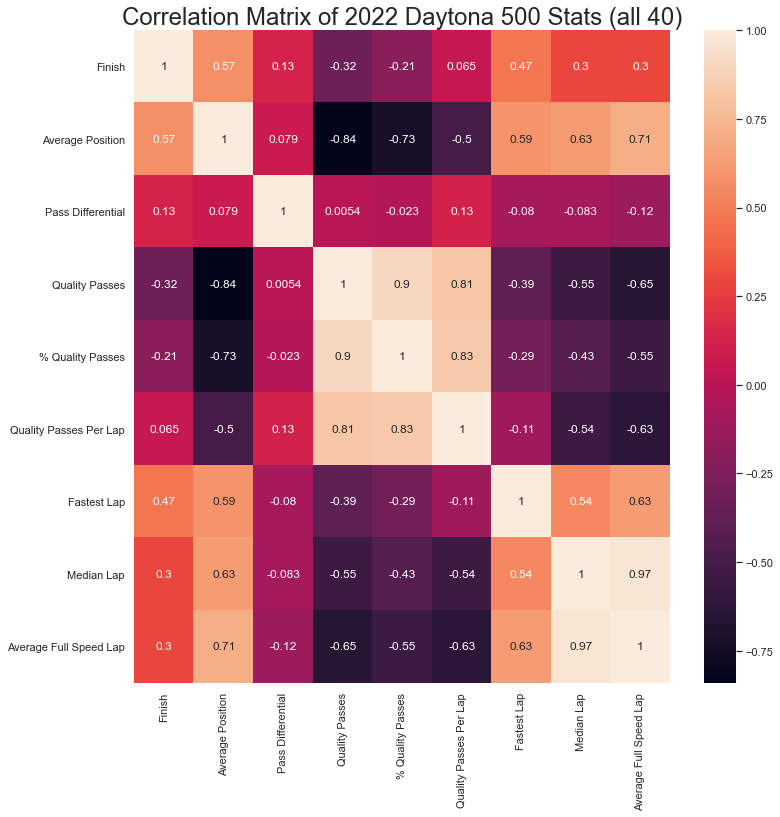

In [ ]:
sns.set_theme(rc = {'figure.figsize':(12,12)})
heatmap_daytona1 = sns.heatmap(daytona1_corr, annot=True)
heatmap_daytona1.set_title("Correlation Matrix of 2022 Daytona 500 Stats (all 40)", fontsize=24)
plt.show()

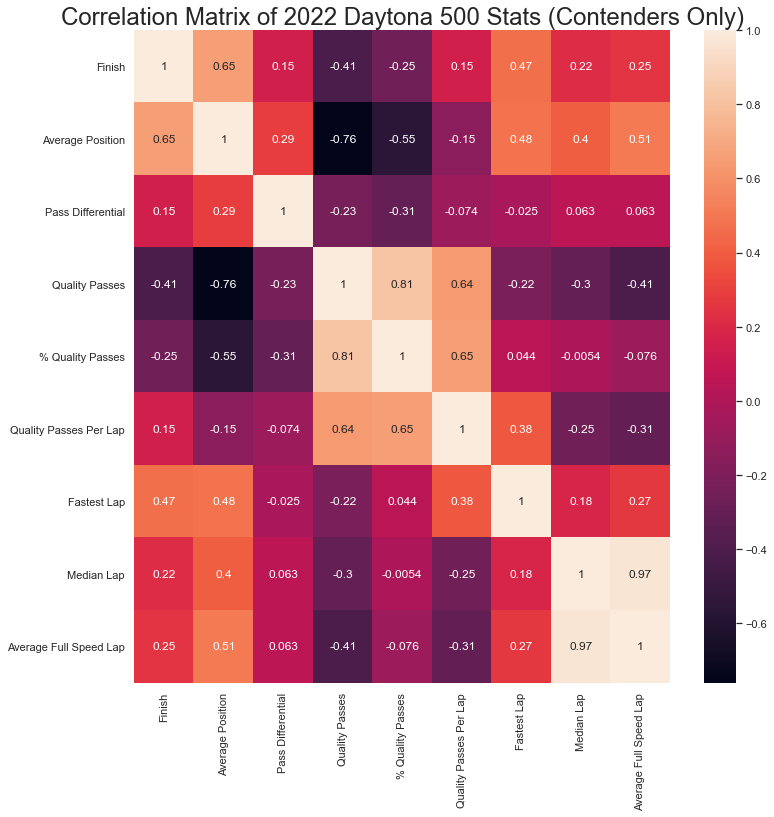

In [ ]:
sns.set_theme(rc = {'figure.figsize':(12,12)})
heatmap_daytona1 = sns.heatmap(daytona1_contenders_corr, annot=True)
heatmap_daytona1.set_title("Correlation Matrix of 2022 Daytona 500 Stats (Contenders Only)", fontsize=24)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9ef4eb23-f38f-47e8-bfb0-51d8616b0dee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>